<a href="https://colab.research.google.com/github/Katonokatono/Suicide/blob/EDA/EDA%26Hypothesis_test_Suicide_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk

In [ ]:
#importing libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from nltk import FreqDist
#for text pre-processing
import re, string

In [ ]:
#loading files
eda = pd.read_csv("/content/final_data_suicide.csv")
eda.head()

,Unnamed: 0,friends_count,followers_count,statuses_count,created_at,retweet_count,label,town,clean_text
0,1,182,83,6950,9/14/2021 7:47,0,anxiety,burundi,bunmo multi item stretchy string fidget toy pk...
1,2,983,915,12944,9/14/2021 7:31,0,anxiety,kenya,unkonfined basic motivation behind behavior bi...
2,3,281,63,290,9/14/2021 7:30,0,anxiety,nairobi,munenekimathi zablonorina bp normal yes check ...
3,4,220,2052,37982,9/14/2021 7:02,0,anxiety,nairobi kenya,deal anxious share experience anxiety yvonne m...
4,5,857,272,650,9/14/2021 7:00,2,general tweet,nairobi,know dry spell cause anxiety depression even s...


In [ ]:
#checking the top of the dataframe
eda.drop(['Unnamed: 0'],axis=1,inplace=True)
eda.head()

,friends_count,followers_count,statuses_count,created_at,retweet_count,label,town,clean_text
0,182,83,6950,9/14/2021 7:47,0,anxiety,burundi,bunmo multi item stretchy string fidget toy pk...
1,983,915,12944,9/14/2021 7:31,0,anxiety,kenya,unkonfined basic motivation behind behavior bi...
2,281,63,290,9/14/2021 7:30,0,anxiety,nairobi,munenekimathi zablonorina bp normal yes check ...
3,220,2052,37982,9/14/2021 7:02,0,anxiety,nairobi kenya,deal anxious share experience anxiety yvonne m...
4,857,272,650,9/14/2021 7:00,2,general tweet,nairobi,know dry spell cause anxiety depression even s...


In [ ]:
eda.tail()

,friends_count,followers_count,statuses_count,created_at,retweet_count,label,town,clean_text
4166,726,117,375,7/9/2021 8:04,0,depression,bungoma,millicentomanga decide put ego aside ask help ...
4167,726,117,375,7/9/2021 8:01,0,depression,bungoma,amerix decide put ego aside ask help barely fe...
4168,746,756,560,7/9/2021 7:04,11,awareness,isiolo,longterm drug effect include depression anxiet...
4169,796,228,3694,7/9/2021 6:33,1,general tweet,kiambu,itsminabo lenana samorai bennytothedj hio ndio...
4170,89,74,151,7/9/2021 6:22,1,depression,nairobi,effective method help someone depress step mak...


In [ ]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4171 entries, 0 to 4170
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   friends_count    4171 non-null   object
 1   followers_count  4171 non-null   int64 
 2   statuses_count   4171 non-null   int64 
 3   created_at       4171 non-null   object
 4   retweet_count    4171 non-null   object
 5   label            4171 non-null   object
 6   town             4171 non-null   object
 7   clean_text       4171 non-null   object
dtypes: int64(2), object(6)
memory usage: 260.8+ KB


In [ ]:
eda.shape

(4171, 8)

In [ ]:
eda.describe()

,followers_count,statuses_count
count,4.171000e+03,4.171000e+03
mean,5.261216e+04,3.734426e+04
std,3.347403e+05,9.729289e+04
min,0.000000e+00,1.000000e+00
25%,2.030000e+02,1.004500e+03
50%,9.150000e+02,5.712000e+03
75%,4.014500e+03,2.456300e+04
max,3.486941e+06,1.805536e+06


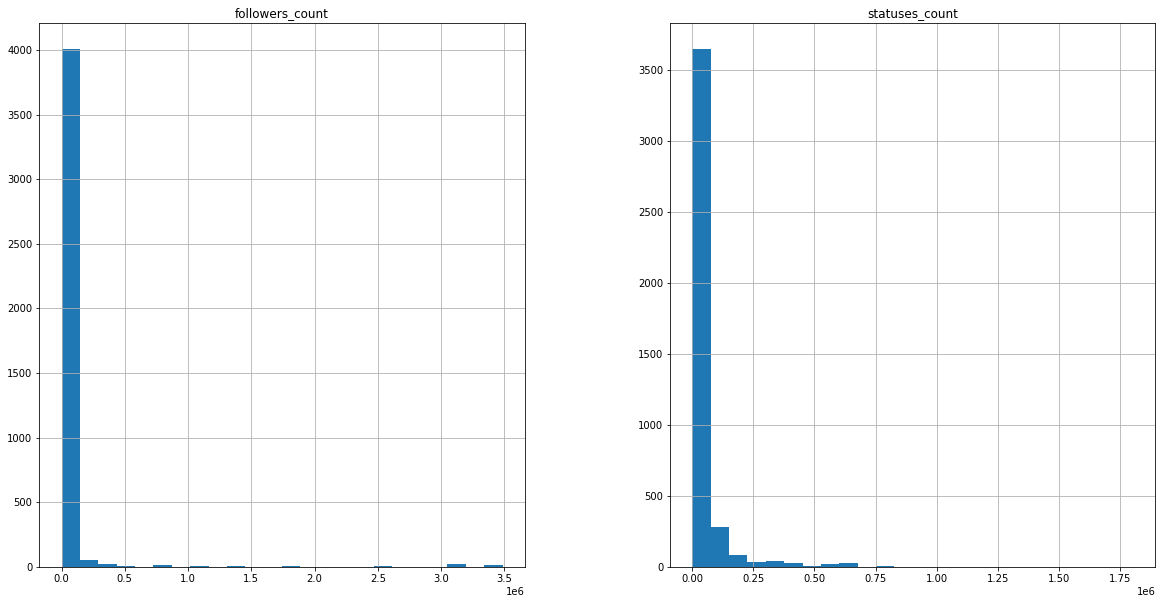

In [ ]:
# plotting histograms to visualize patterns in the data

# plotting histograms
eda.hist(figsize = (20,10), bins= 24)
plt.show()

The histograms are unimodal

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'tweets')

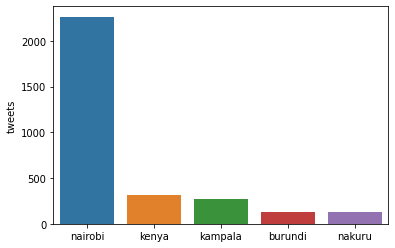

In [ ]:
# checking the towns
x= eda.town.value_counts(ascending=False).iloc[:5]
sns.barplot(x.index,x)
plt.gca().set_ylabel('tweets')

Nairobi had the most tweets followed by Nakuru.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


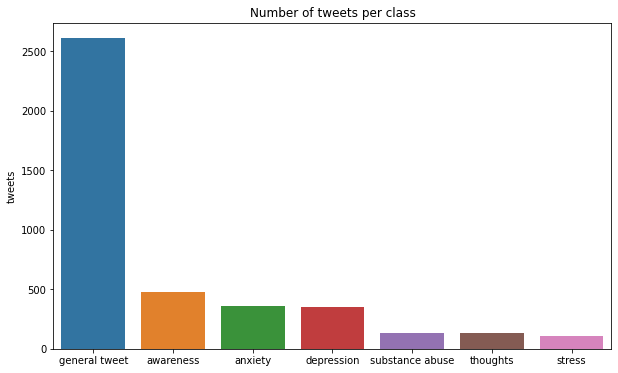

In [ ]:
# let us see how the labels are distributed in our dataset
# view data distribution for class imbalance
# checking the class balance of our labels
fig, ax = plt.subplots(figsize=(10,6))
x=eda.label.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('tweets')
plt.title('Number of tweets per class')
plt.show();

General tweets were the most followed by awareness.

We observe that the most factor that contributes to suicidal thoughts are depression and the least issubstance abuse.

In [ ]:
eda['label'].value_counts()

general tweet      2609
awareness           478
anxiety             357
depression          355
substance abuse     134
thoughts            129
stress              109
Name: label, dtype: int64

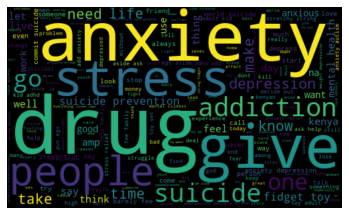

In [ ]:
#plotting the wordcount
from wordcloud import WordCloud 

allWords= ''.join( [twts for twts in eda['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

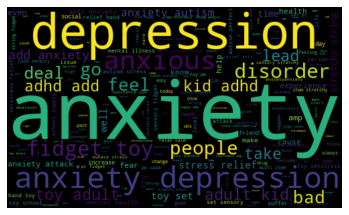

In [ ]:
#plotting the wordcount
from wordcloud import WordCloud 
anxiety = eda[eda['label'] == 'anxiety' ]
allWords= ''.join( [twts for twts in anxiety['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

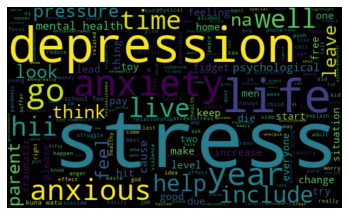

In [ ]:
#plotting the wordcount
from wordcloud import WordCloud 
stress = eda[eda['label'] == 'stress' ]
allWords= ''.join( [twts for twts in stress['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

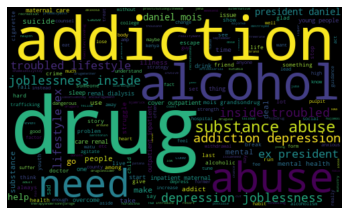

In [ ]:
#plotting the wordcount
from wordcloud import WordCloud 
sub_abuse = eda[eda['label'] == 'substance abuse' ]
allWords= ''.join( [twts for twts in sub_abuse['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

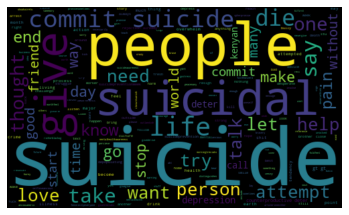

In [ ]:
#plotting the wordcount
from wordcloud import WordCloud 
sub_abuse = eda[eda['label'] == 'thoughts' ]
allWords= ''.join( [twts for twts in sub_abuse['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

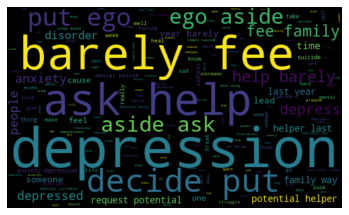

In [ ]:
#plotting the wordcount
from wordcloud import WordCloud 
sub_abuse = eda[eda['label'] == 'depression' ]
allWords= ''.join( [twts for twts in sub_abuse['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

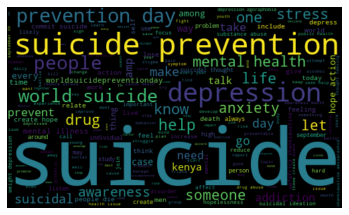

In [ ]:
#plotting the wordcount
from wordcloud import WordCloud 
sub_abuse = eda[eda['label'] == 'awareness' ]
allWords= ''.join( [twts for twts in sub_abuse['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

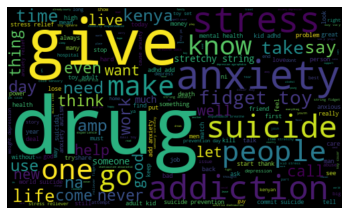

In [ ]:
#plotting the wordcount
from wordcloud import WordCloud 
sub_abuse = eda[eda['label'] == 'general tweet' ]
allWords= ''.join( [twts for twts in sub_abuse['clean_text']] )
WordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119, ).generate(allWords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Time analysis

In [ ]:
#loading the dataset
#
df1= pd.read_csv('/content/final_data_suicide-1.csv')
df2= pd.read_excel('/content/final_data_suicide-2.csv.xlsx')
df3= pd.read_excel('/content/final_data_suicide-3.xlsx')

In [ ]:
#change create at to date time 
import datetime
df1['created_at'] = pd.to_datetime(df1['created_at'])

df1['date'] = pd.to_datetime(df1['created_at'],format="%Y/%m/%d %H:%M:%S")
df1['year'] = pd.DatetimeIndex(df1['created_at']).year
df1['month'] = pd.DatetimeIndex(df1['created_at']).month
df1['hour'] = pd.DatetimeIndex(df1['created_at']).hour
df1['minute'] = pd.DatetimeIndex(df1['created_at']).minute


In [ ]:
#change create at to date time 
import datetime
df2['created_at'] = pd.to_datetime(df2['created_at'])

df2['date'] = pd.to_datetime(df2['created_at'],format="%d-%m-%Y %H:%M")
df2['year'] = pd.DatetimeIndex(df2['created_at']).year
df2['month'] = pd.DatetimeIndex(df2['created_at']).month
df2['hour'] = pd.DatetimeIndex(df2['created_at']).hour
df2['minute'] = pd.DatetimeIndex(df2['created_at']).minute

In [ ]:
#change create at to date time 
import datetime
df3['created_at'] = pd.to_datetime(df3['created_at'])

df3['date'] = pd.to_datetime(df3['created_at'],format="%d/%m/%Y %H:%M")
df3['year'] = pd.DatetimeIndex(df3['created_at']).year
df3['month'] = pd.DatetimeIndex(df3['created_at']).month
df3['hour'] = pd.DatetimeIndex(df3['created_at']).hour
df3['minute'] = pd.DatetimeIndex(df3['created_at']).minute

In [ ]:
#concatenate the 3 datasets

eda_file= pd.concat([df1, df2, df3], ignore_index=True)

In [ ]:
eda_file.head(2)

,Unnamed: 0,friends_count,followers_count,statuses_count,created_at,retweet_count,label,town,clean_text,date,year,month,hour,minute
0,1,182,83,6950,2021-09-14 07:47:00,0,anxiety,burundi,bunmo multi item stretchy string fidget toy pk...,2021-09-14 07:47:00,2021,9,7,47
1,2,983,915,12944,2021-09-14 07:31:00,0,anxiety,kenya,unkonfined basic motivation behind behavior bi...,2021-09-14 07:31:00,2021,9,7,31


In [ ]:
eda_file

,Unnamed: 0,friends_count,followers_count,statuses_count,created_at,retweet_count,label,town,clean_text,date,year,month,hour,minute
0,1,182,83,6950,2021-09-14 07:47:00,0,anxiety,burundi,bunmo multi item stretchy string fidget toy pk...,2021-09-14 07:47:00,2021,9,7,47
1,2,983,915,12944,2021-09-14 07:31:00,0,anxiety,kenya,unkonfined basic motivation behind behavior bi...,2021-09-14 07:31:00,2021,9,7,31
2,3,281,63,290,2021-09-14 07:30:00,0,anxiety,nairobi,munenekimathi zablonorina bp normal yes check ...,2021-09-14 07:30:00,2021,9,7,30
3,4,220,2052,37982,2021-09-14 07:02:00,0,anxiety,nairobi kenya,deal anxious share experience anxiety yvonne m...,2021-09-14 07:02:00,2021,9,7,2
4,5,857,272,650,2021-09-14 07:00:00,2,general tweet,nairobi,know dry spell cause anxiety depression even s...,2021-09-14 07:00:00,2021,9,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4162,25,766,19610,47801,2021-09-13 06:20:00,0,awareness,nairobi,school curriculum progs morning social study g...,2021-09-13 06:20:00,2021,9,6,20
4163,46,314,10,81,2021-09-15 13:43:00,0,awareness,nairobi,recovery progression perfection help concern d...,2021-09-15 13:43:00,2021,9,13,43
4164,48,439,116,46,2021-09-14 13:03:00,0,awareness,nakuru,tune thursday listen expert talk addiction dru...,2021-09-14 13:03:00,2021,9,13,3
4165,50,515,272,403,2021-09-13 08:21:00,0,awareness,nairobi,thegunmenhunter thank share kindly explain ena...,2021-09-13 08:21:00,2021,9,8,21


In [ ]:
eda_file.shape

(4167, 14)

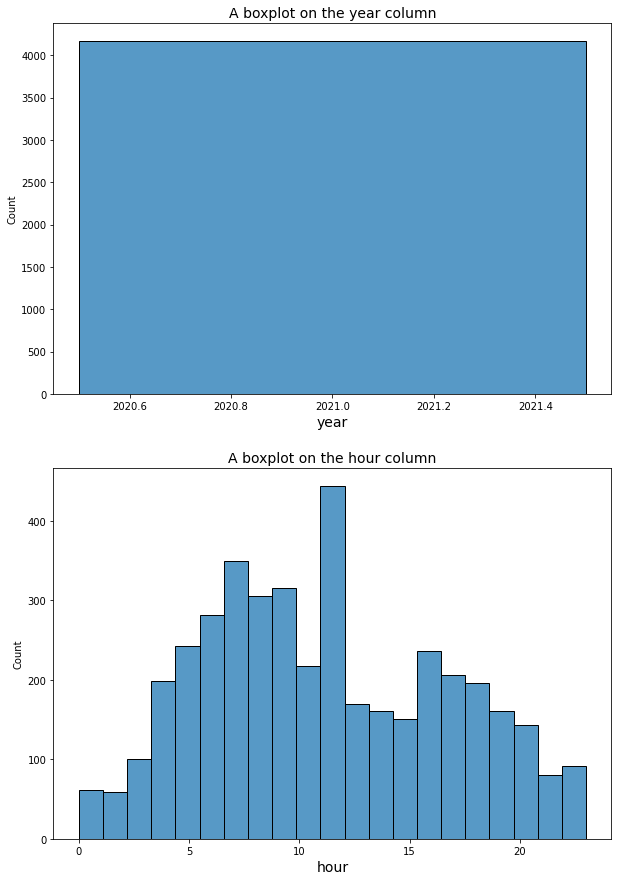

In [ ]:
#boxplot for year and hour column
col_names = ['year', 'hour']
fig, ax = plt.subplots(len(col_names), figsize = (10,15))
for i, col_val in enumerate(col_names):

    sns.histplot(x = eda_file[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=14)
plt.show()

Label encoding

In [ ]:
# converting type of columns to 'category'
from sklearn.preprocessing import LabelEncoder
eda['label'] = eda['label'].astype('category')

# creating instance of labelencoder
labelencoder = LabelEncoder()
eda['encoded_class'] = labelencoder.fit_transform(eda['label'])
eda

,friends_count,followers_count,statuses_count,created_at,retweet_count,label,town,clean_text,encoded_class
0,182,83,6950,9/14/2021 7:47,0,anxiety,burundi,bunmo multi item stretchy string fidget toy pk...,0
1,983,915,12944,9/14/2021 7:31,0,anxiety,kenya,unkonfined basic motivation behind behavior bi...,0
2,281,63,290,9/14/2021 7:30,0,anxiety,nairobi,munenekimathi zablonorina bp normal yes check ...,0
3,220,2052,37982,9/14/2021 7:02,0,anxiety,nairobi kenya,deal anxious share experience anxiety yvonne m...,0
4,857,272,650,9/14/2021 7:00,2,general tweet,nairobi,know dry spell cause anxiety depression even s...,3
...,...,...,...,...,...,...,...,...,...
4166,726,117,375,7/9/2021 8:04,0,depression,bungoma,millicentomanga decide put ego aside ask help ...,2
4167,726,117,375,7/9/2021 8:01,0,depression,bungoma,amerix decide put ego aside ask help barely fe...,2
4168,746,756,560,7/9/2021 7:04,11,awareness,isiolo,longterm drug effect include depression anxiet...,1
4169,796,228,3694,7/9/2021 6:33,1,general tweet,kiambu,itsminabo lenana samorai bennytothedj hio ndio...,3


Visualizing of tweets according to hour

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

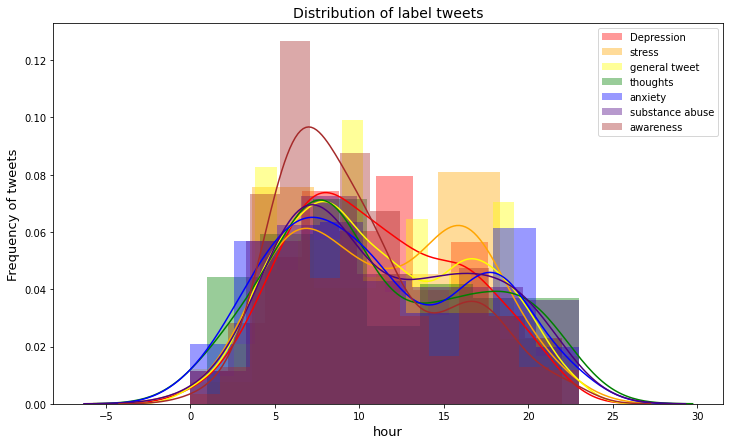

In [ ]:
# Plotting histogram to show distribution of suicidal factors as compared to the hour 

one = eda_file.loc[eda_file['label']=='depression', 'hour']     
two = eda_file.loc[eda_file['label']=='stress', 'hour']    
three = eda_file.loc[eda_file['label']=='general tweet', 'hour']   
four = eda_file.loc[eda_file['label']=='thoughts', 'hour']    
five = eda_file.loc[eda_file['label']=='anxiety', 'hour']    
six = eda_file.loc[eda_file['label']=='substance abuse', 'hour']    
seven = eda_file.loc[eda_file['label']=='awareness', 'hour']    




# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(one, color="red", label="Depression")
sns.distplot(two, color="orange", label="stress")
sns.distplot(three, color="yellow", label="general tweet")
sns.distplot(four, color="green", label="thoughts")
sns.distplot(five, color="blue", label="anxiety")
sns.distplot(six, color="indigo", label="substance abuse")
sns.distplot(seven, color="brown", label="awareness")

plt.title('Distribution of label tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


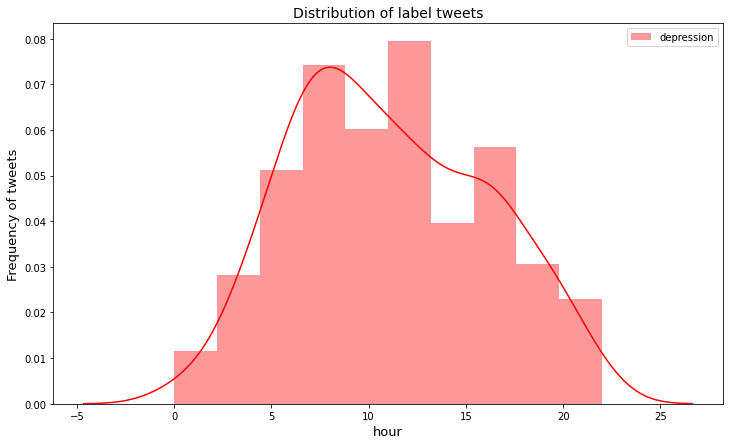

In [ ]:
# Plotting the histograms for depression
#
plt.figure(figsize=(12,7))
sns.distplot(one, color="red", label="depression")


plt.title('Distribution of label tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

The most hours that the users tweeted about depression is 7 am - 9 am and with the higest at 11 am- 1 pm 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


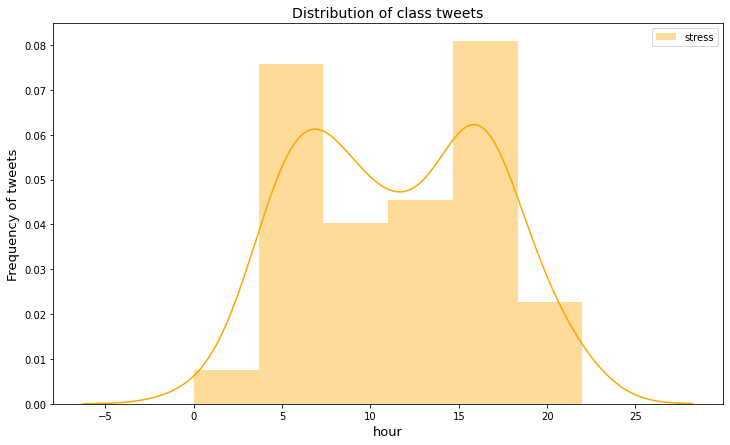

In [ ]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(two, color="orange", label="stress")

plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

The most hours that the users tweeted about stress is 4 am - 7 am and with the higest at 3 pm - 6 pm.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


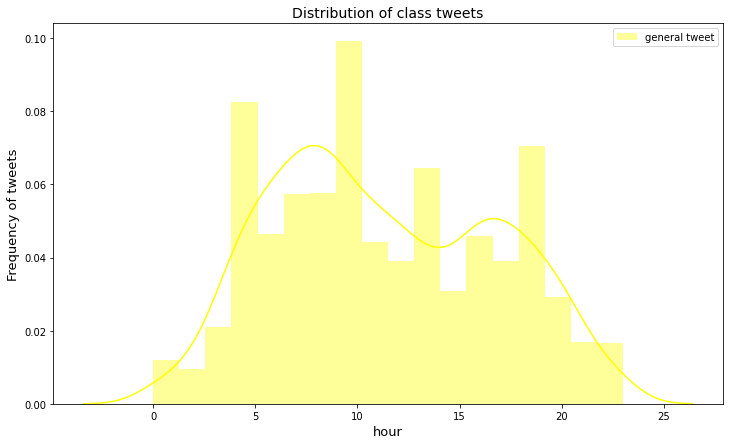

In [ ]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(three, color="yellow", label="general tweet")


plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

The most hours that the users tweeted about general tweet is 8 am - 9 am.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


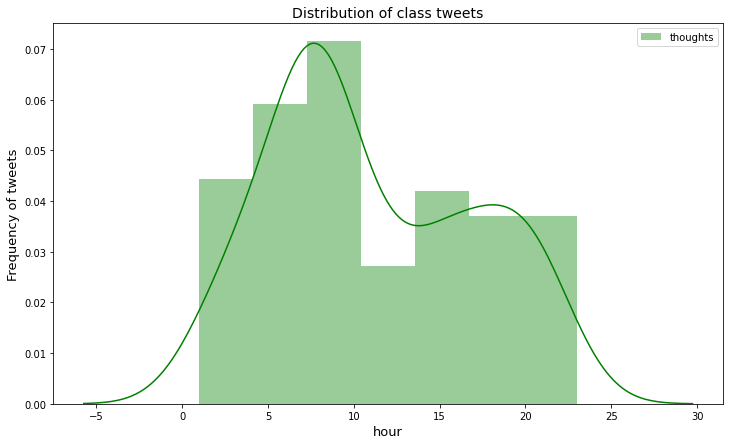

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

In [ ]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(four, color="green", label="thoughts")


plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

plt.figure(figsize=(12,7))


The most hours that the users tweeted about suicidal thoughts is 7 pm- 10 pm.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


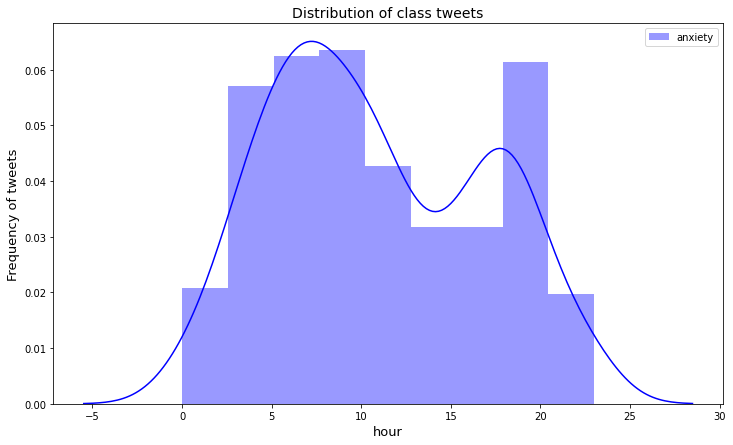

In [ ]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(five, color="blue", label="anxiety")

plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

The most hours that the users tweeted about anxiety is 9 am- 10 am.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


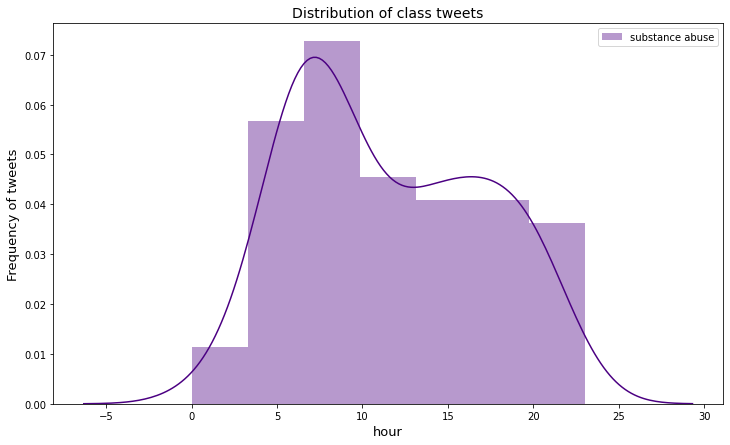

In [ ]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(six, color="indigo", label="substance abuse")

plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

The most hours that the users tweeted about depression is 7 am - 11 am.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


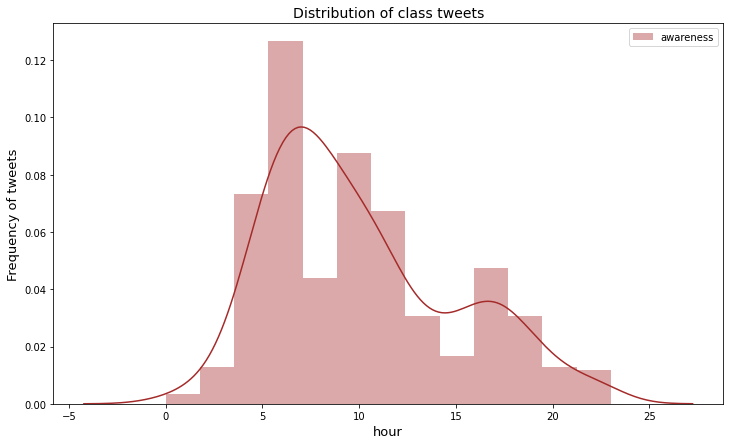

In [ ]:
# Plotting the histograms
#
plt.figure(figsize=(12,7))

sns.distplot(seven, color="brown", label="awareness")

plt.title('Distribution of class tweets', fontsize = 14, color = 'k')
plt.xlabel('hour', fontsize = 13, color = 'k')
plt.ylabel('Frequency of tweets', fontsize = 13, color = 'k')
plt.legend()
plt.show()

The most hours that the users tweeted about awareness is 6 am - 7 am.

# Hypothesis Testing

Ho: Most suicidal tweets are posted between 5 am and 11 am.

H1: Most suicidal tweets are not posted between 5 am and 11 am.

alpha = 0.05

In [ ]:
eda_file['hour'].unique()

array([ 7,  6,  5,  4,  1,  0, 22, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11,
       10,  9,  8,  3,  2, 23, 21])

In [ ]:
time= eda_file[eda_file['hour'].between(5,11)]

In [ ]:
time['hour'].unique()

array([ 7,  6,  5, 11, 10,  9,  8])

In [ ]:
from scipy import stats
stats.chi2_contingency(pd.crosstab(eda_file['label'],time['hour']))

(41.985047516745496,
 0.22744197878799371,
 36,
 array([[ 19.6948118 ,  22.95015259,  28.40284842,  24.82197355,
          25.63580875,  17.6602238 ,  20.83418108],
        [ 36.5584944 ,  42.60122075,  52.72278739,  46.0757884 ,
          47.58646999,  32.78179044,  38.67344863],
        [ 20.80264496,  24.24109868,  30.00050865,  26.21820956,
          27.07782299,  18.65361139,  22.00610376],
        [144.01831129, 167.82299084, 207.69582909, 181.51068159,
         187.46185148, 129.14038657, 152.34994914],
        [  5.78535097,   6.74160732,   8.34333672,   7.29145473,
           7.53051882,   5.18769074,   6.12004069],
        [  7.87792472,   9.18006104,  11.36113937,   9.92878942,
          10.2543235 ,   7.06408952,   8.33367243],
        [  7.26246185,   8.46286877,  10.47355036,   9.15310275,
           9.45320448,   6.51220753,   7.68260427]]))

From the test, the chi- statistic is 41.96

The p-value is 0.227 which is greater than 0.05

This indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis.

In this case we fail to reject null hypothesis and conclude that most suicidal tweets are posted between 5 am and 11 am.